Project : Customer Lifetime Value Analysis

In [30]:
import pandas as pd 
import plotly.io as pio
import plotly.graph_objects as go 
import plotly.express as px
pio.templates.default = "plotly_white"

In [31]:
 data= pd.read_csv("customer_acquisition_data.csv")

In [32]:
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


Question 1: Make a visualization  the distribution of acquisition cost and revenue generated bu the customer using histograms:

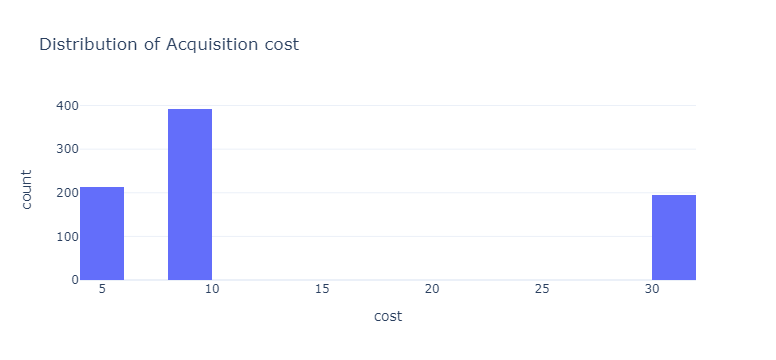

In [33]:
fig = px.histogram (data, 
                   x = "cost",
                    nbins=20,
                   title='Distribution of Acquisition cost')
fig.show()

Question 2: Create a Visualization for the revenue gererated by the customer

In [34]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


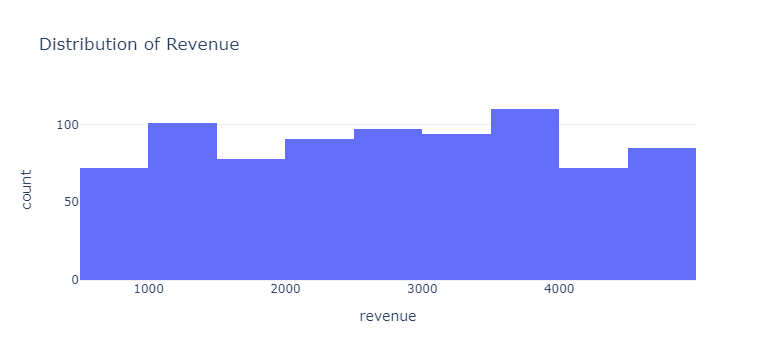

In [35]:
fig = px.histogram (data, 
                   x = "revenue",
                    nbins=20,
                   title='Distribution of Revenue')
fig.show()

Question 3 : Compare the cost of acquisition across various channels and determine which ones are the most and least profitable

In [36]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


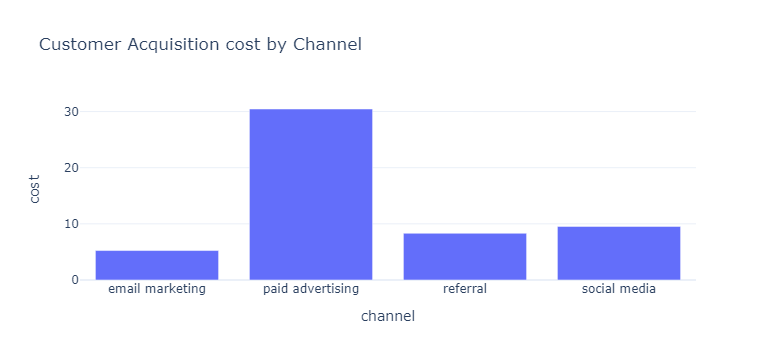

In [37]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()
fig = px.bar(cost_by_channel,
            x = 'channel',
            y = 'cost',
            title='Customer Acquisition cost by Channel')
fig.show()

In [38]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


Question 4: Find out which channels are most and least effective at converting customers?

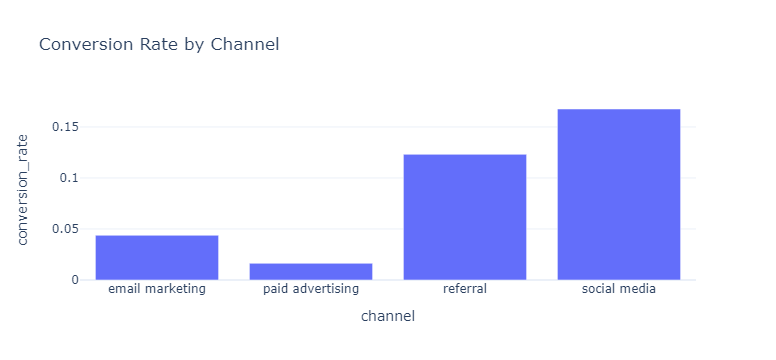

In [39]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()
fig = px.bar(conversion_by_channel,
            x ='channel',
            y = 'conversion_rate',
           title='Conversion Rate by Channel')
fig.show()

In [40]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


Question 5: Calculate the total revenue by channel and have a look at the most and least profitable channels in term of gererating revenue

In [41]:
revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


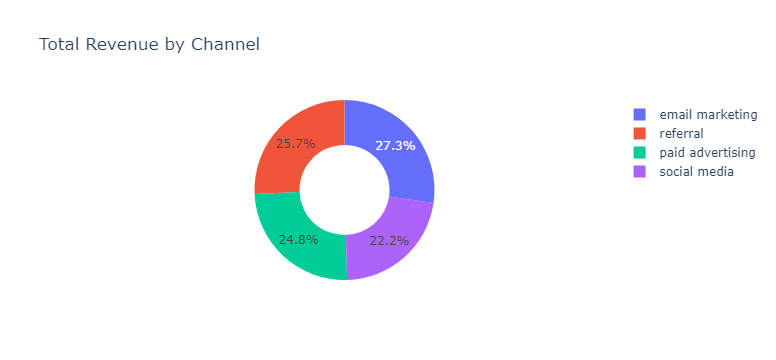

In [43]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()
fig = px.pie(revenue_by_channel,
              values= 'revenue',
              names = 'channel',
              title='Total Revenue by Channel',
              hole = 0.5)
fig.show()


Question 6 : Calculate the return on investment (ROI) for each channel.

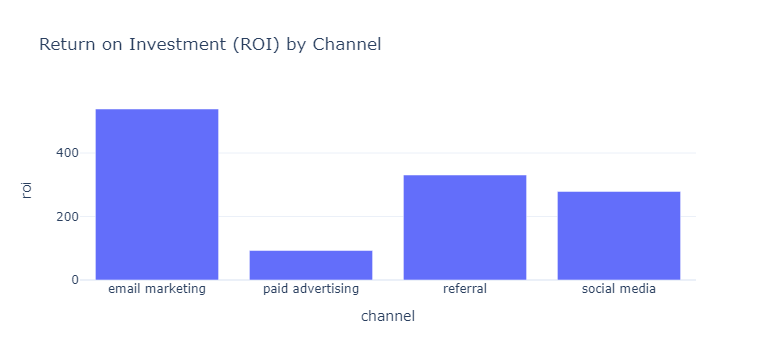

In [52]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()
fig = px.bar(roi_by_channel , 
             x = 'channel',
             y = 'roi',
             title= 'Return on Investment (ROI) by Channel')
fig.show()